In [1]:
%%html
<style type="text/css">

.reveal table {
    font-size: 1em;
}

.reveal div.jp-MarkdownOutput {
    font-size: 30px;
}

.reveal div.highlight>pre {
    margin: 0; 
    width: 100%;
    font-size: 25px;
}

.reveal div.jp-OutputArea-output>pre {
    margin: 0; 
    width: 90%;
    font-size: 25px;
    box-shadow: none;
}

</style>

## Presenting

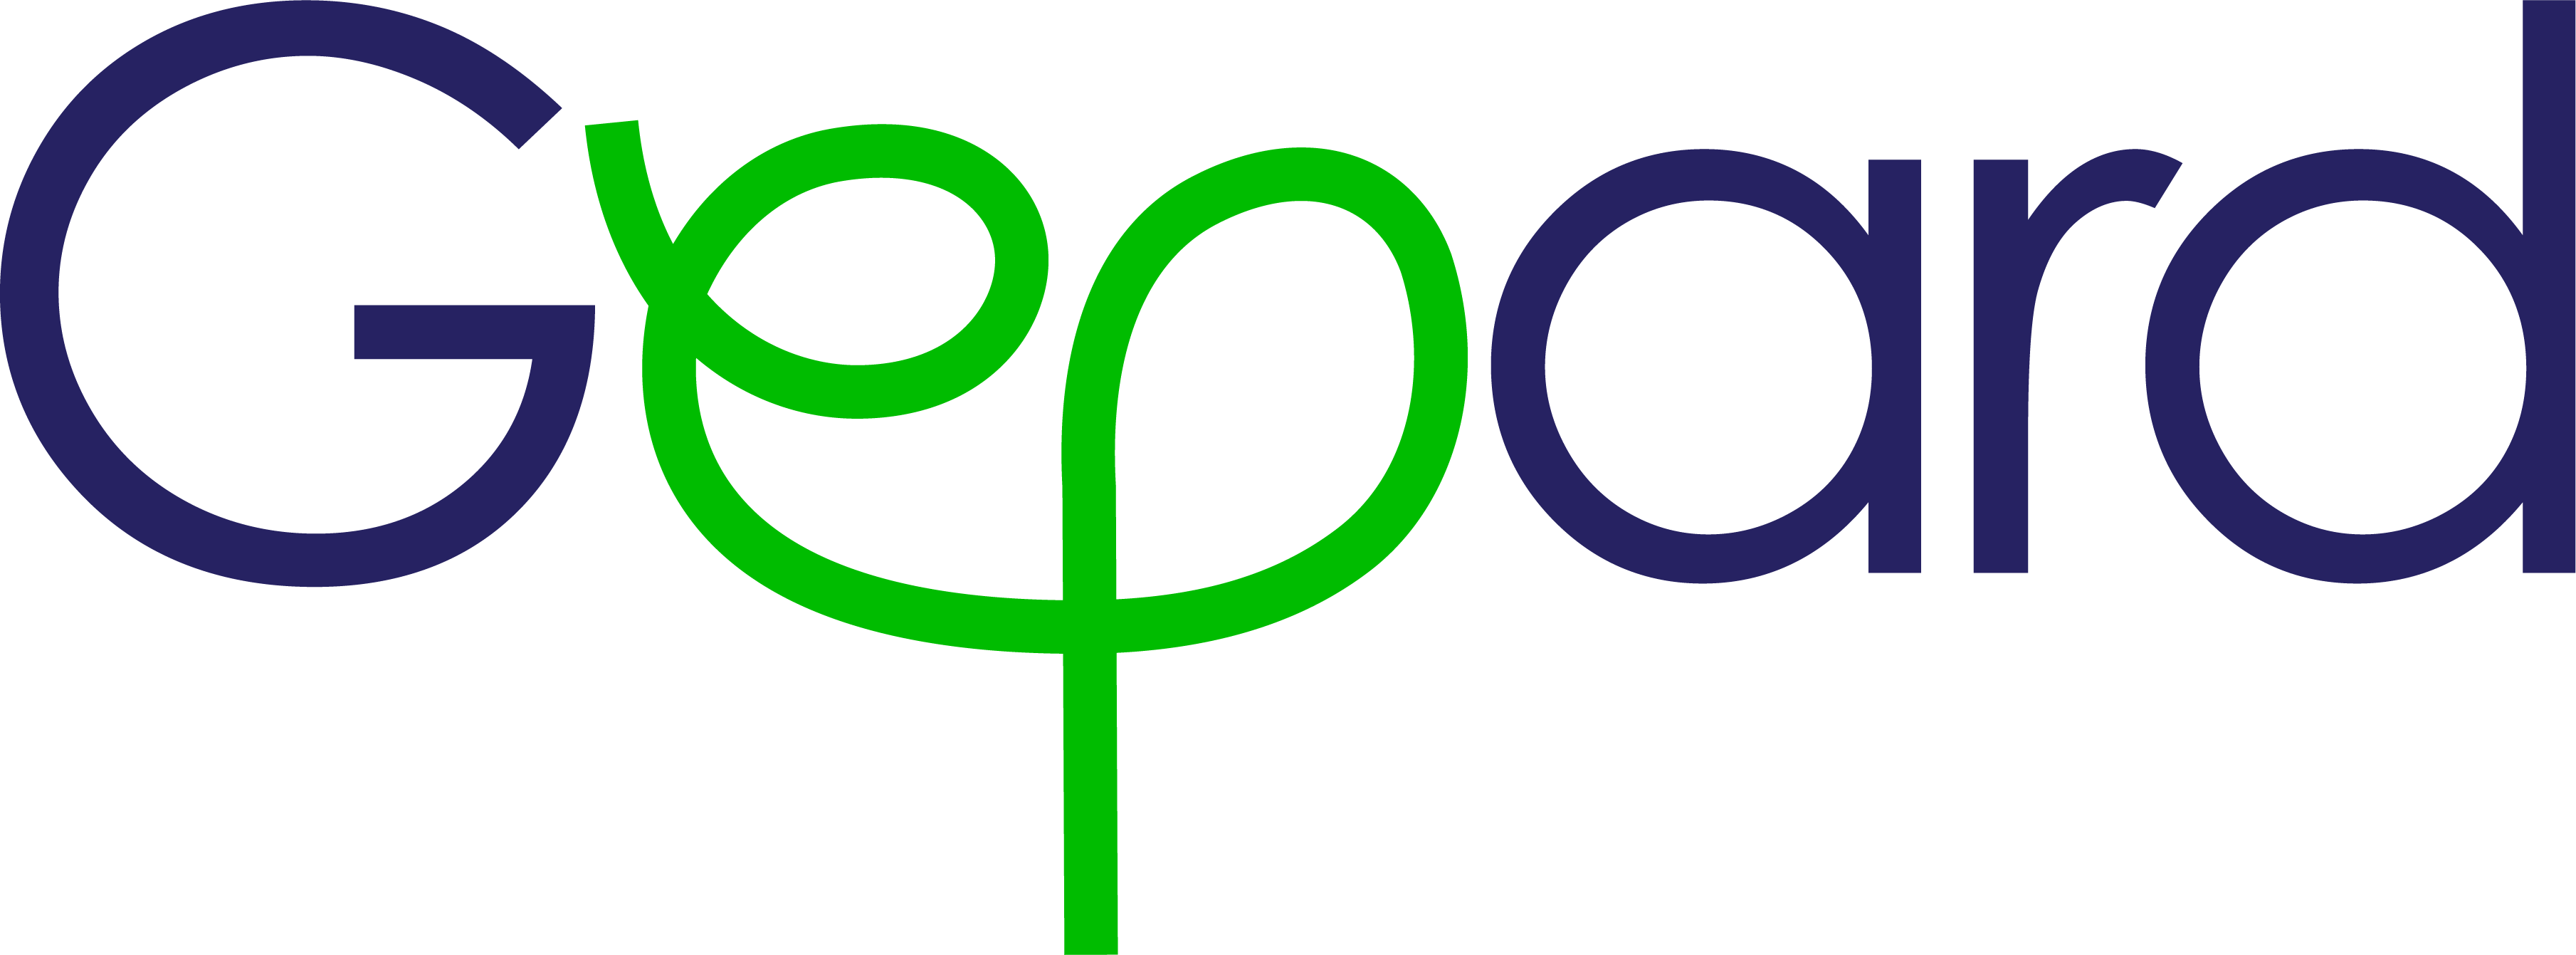

<img align="right" width="200" src="https://calculon.phy.hr/pub/HRZZ-STRONG.png">

**Gepard** - tool for studying GPDs

   * Modelling Generalized Parton Distributions (GPDs) and Compton form factors (CFFs).
   * Perturbative NLO QCD evolution of GPDs
   * Calculation of deeply virtual Compton scattering (DVCS) and deeply virtual (vector) meson production (DVMP) observables to NLO accuracy.
   * Fitting parametrized models to the experimental data.

| **Old Gepard**        | **New Gepard** |
|-----------------------|----------------|
| Fortran + C + Python  | Python         |
| NNLO, Neural nets     | NLO only       |
| 2x faster             |                |
| also public now       |                |

Sources are on `github.com`, but you can just install Gepard as any "official" Python package
```
% pip install gepard
```
For interactive work, it is best to use Jupyter notebooks.

In [2]:
import gepard as g
print(g.__version__)

0.9.11


## Simple use 

(Just want to calculate observables / CFFs / GPDs for available models.)

``DataPoint`` **object**: contains information about kinematics and, possibly, about particular measurement perfomed at that kinematics

``Theory`` **object**: contains algorithms for evaluation of various structure functions (CFFs, GPDs, …) and observables (cross-sections, asymmetries, …) for a given data point

In [3]:
# Constructing DataPoint object:
pt = g.DataPoint(xB=0.348, t=-0.3, Q2=3., phi=0.3)

In [4]:
# Some Theory objects are available already:
from gepard.fits import th_KM15  
th_KM15.XGAMMA(pt)   # gamma* cross-section

16.33882710095779

In [5]:
th_KM15.ImH(pt)  # calculating CFF

2.807544271408012

In [6]:
# Experimental measurement datapoint:
pt = g.DataPoint(xB=0.348, t=-0.3, Q2=3., phi=0.3, 
                 process='ep2epgamma', in1charge=-1,
                 exptype='fixed target', in1energy=6.,
                 in1polarization=+1,
                 observable='XS', val=0.21, err=0.01)

pt.W, pt.xi   # auto-calculated kinematics

(2.5497144988314844, 0.21065375302663436)

In [7]:
# There is a database of datasets available:
g.describe_data(g.dset[32])

npt x obs     collab  FTn    id  ref.        
----------------------------------------------
18 x AC      HERMES  0.0    32  arXiv:0909.3587
18 x AC      HERMES  1.0    32  arXiv:0909.3587
----------------------------------------------
TOTAL = 36


In [8]:
th_KM15.chisq(g.dset[32])  # chi-square for dataset

20.525561762363605

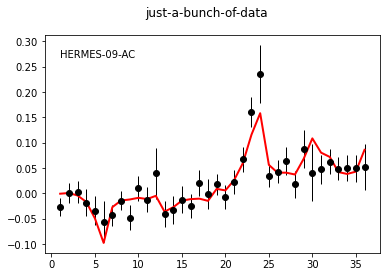

In [9]:
from gepard.plots import jbod  # just a bunch of data
fig = jbod(points=g.dset[32], lines=th_KM15)

## Advanced use 

(Constructing new models and fitting them to data.)

In [10]:
class MyTheory(g.PWNormGPD, g.MellinBarnesCFF, g.DIS,
               g.BMK):
    pass

th = MyTheory(p=1)  # instance of Theory object

   * for GPDs we take SO(3) partial-waves conformal space model ``PWNormGPD``,
   * for CFFs we take ``MellinBarnesCFF`` which combines conformal space GPDs with appropriate hard-scattering coefficients,

In [11]:
pts = g.dset[39]+g.dset[206]
g.describe_data(pts)

npt x obs     collab  FTn    id  ref.        
----------------------------------------------
10 x DISF2   H1      N/A    206 Nucl.Phys.B470(96)3
 8 x XGAMMA  H1      N/A    39  hep-ex/0505061
----------------------------------------------
TOTAL = 18


In [12]:
th.chisq(pts) / len(pts)  # catastrophic chi-square

19.510439845624596

In [13]:
# Construction of Fitter object
# ... relying on iminuit package
f = g.MinuitFitter(pts, th)
# Adjusting sea-quarks normalization and t-dependence
f.release_parameters('ns', 'ms2', 'secs')
f.fit()

In [14]:
th.chisq(pts) / len(pts)  # chi-square

0.35169097347940204

In [15]:
f.minuit.covariance  # access iminuit functionalities

,ns,al0s,Eal0s,alps,Ealps,ms2,Ems2,secs,Esecs,this,Ethis,kaps,ng,Eng,al0g,Eal0g,alpg,Ealpg,mg2,Emg2,secg,Esecg,thig,Ethig,kapg,delms2,pows,delmg2,powg,Ens,Edelms2,Epows,Edelmg2,Epowg
ns,3.88e-05,0,0,0,0,-1.26e-05 (-0.021),0,-0.000127 (-0.626),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
al0s,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Eal0s,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alps,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ealps,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ms2,-1.26e-05 (-0.021),0,0,0,0,0.00928,0,-0.00214 (-0.679),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ems2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
secs,-0.000127 (-0.626),0,0,0,0,-0.00214 (-0.679),0,0.00106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Esecs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
this,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Some features 

In [16]:
# conversion to pandas DataFrame
pts.df()[['xB', 't', 'val']].head()

,xB,t,val
0,0.000793,-0.1,29.90
1,0.000793,-0.3,8.00
2,0.000793,-0.5,2.13
3,0.000793,-0.8,0.27
4,0.001189,-0.1,13.30


In [17]:
# kinematical cuts
cut_pts = g.select(g.dset[39], criteria=['Q2 > 5'])
cut_pts.df().Q2.min()  # minimal Q2 in set after cut

8.0

In [18]:
# x-space GPDs  (only for x=0, x=xi)
ptx = g.DataPoint(x=0.01, eta=0.01, t=-0.2, Q2=8)
th.Hx(ptx)

array([ 31.29251363, 383.11563299,   0.        ])

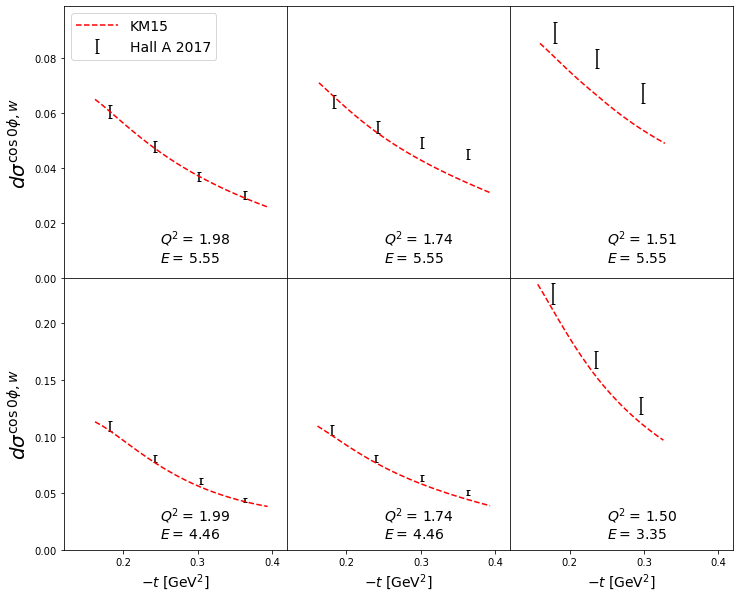

In [19]:
# Predefined plots for some experimental sets
from gepard.plots import HallA17
fig = HallA17(lines=th_KM15)

In [20]:
# Most of the functions are thoroughly documented:
print(g.DataPoint.__doc__)

Kinematical point. May correspond to actual measurement.

    Args:
        xB (float): Bjorken x_B
        t (float): momentum transfer to target squared
        Q2 (float): Q^2
        phi (float): azimuthal angle
        FTn (int): harmonic of azimuthal angle, e.g. -1 for sin(phi)
        observable (str): name of the measured observable
        val (float): measurement value
        err (float): total uncertainty of `val`
        units (dict): pysical units of variables
        kindict (dict): for old, alternative passing of kinematics values,
                 like ``g.DataPoint({'xB': 0.1, 't': -0.2, 'Q2': 4.0})``

    There are other args as well.

    Examples:
            >>> pt = g.DataPoint(xB=0.1, t=-0.2, Q2=4.0)

    Todo:
        `kindict` is temporarily kept for backward compatibility.
        You should not rely on it.

    


In [21]:
# Large suite of tests:
!pytest /home/kkumer/gepard/tests

============================= test session starts ==============================
platform linux -- Python 3.10.2, pytest-7.1.1, pluggy-1.0.0
rootdir: /home/kkumer/gepard, configfile: pytest.ini
plugins: cov-2.12.1, typeguard-2.13.3, profiling-1.7.0, anyio-3.5.0
collected 111 items                                                            

../../gepard/tests/GK_test.py ..........                                 [  9%]
../../gepard/tests/adacf_test.py .                                       [  9%]
../../gepard/tests/cff_test.py ...........s..s.......                    [ 29%]
../../gepard/tests/dvmp_test.py ....s                                    [ 34%]
../../gepard/tests/elastic_ff_test.py .......                            [ 40%]
../../gepard/tests/evol_test.py .....                                    [ 45%]
../../gepard/tests/fit_test.py ss.ss                                     [ 49%]
../../gepard/tests/fits_KM_test.py ..ssss.s                              [ 56%]
../../gepard/test

## For more, go to [gepard.phy.hr](https://gepard.phy.hr/)